# Create connection

In [4]:
import mysql.connector
import pandas as pd
from PIL import Image
from io import BytesIO


mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="admin",
  database="protein_db"
)

print(mydb)

Read MySQL as Pandas DataFrame

In [5]:

query = "SELECT * FROM genome"

df = pd.read_sql(query, con=mydb)

mydb.close()

df


c:\Users\bonfi\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,genome_id,species_name,genome_name,access_code
0,1,Salmo salar,ICSASG_v2,GCA_000233375.4


Load image in the database

In [6]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="admin",
  database="protein_db"
)

cursor = mydb.cursor()

# Read the image file as binary data
with open('protein.jpg', 'rb') as file:
    image_data = file.read()

# Insert the image data into the database

insert_query = "INSERT INTO genome_image (species_name, genome_name, access_code, image_demo, image_demo_name) VALUES (%s, %s, %s, %s, %s)"
cursor.execute(insert_query, ('Salmo salar', 'ICSASG_v2', 'GCA_000233375.4', image_data, 'protein.jpg'))

mydb.commit()

cursor.close()
mydb.close()


Retrieve Image from database

In [7]:


mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="admin",
  database="protein_db"
)

cursor = mydb.cursor()

select_query = "SELECT image_demo FROM genome_image"
cursor.execute(select_query)
image_data = cursor.fetchone()[0]


image = Image.open(BytesIO(image_data))
image.show()

cursor.close()
mydb.close()


# Demo table

This next script assumes that the user can create a table, grant the permissions to do so!

In [8]:
import mysql.connector


mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="admin",
  database="protein_db"
)


In [9]:
query_demo = """CREATE TABLE IF NOT EXISTS `protein_db`.`demo` (
                  `Name` VARCHAR(45) NULL,
                  `Image_Path` VARCHAR(45) NULL,
                  `Description` VARCHAR(45) NULL,
                  `Image` VARCHAR(45) NULL,
                  `Image_demo` BLOB NULL)
                ENGINE = InnoDB;"""


cursor = mydb.cursor()

cursor.execute(query_demo)

In [10]:

with open('patas.jpg', 'rb') as file:
    image_data = file.read()

insert_query = "INSERT INTO demo (Name, Image_Path, Description, Image, Image_demo) VALUES (%s, %s, %s, %s, %s)"
cursor.execute(insert_query, ('patas', 'patas.jpg', 'Description1', 'True', image_data))
mydb.commit()


with open('protein.jpg', 'rb') as file:
    image_data = file.read()

insert_query = "INSERT INTO demo (Name, Image_Path, Description, Image, Image_demo) VALUES (%s, %s, %s, %s, %s)"
cursor.execute(insert_query, ('protein', 'protein.jpg', 'Description2', 'True', image_data))
mydb.commit()


with open('orejas.jpg', 'rb') as file:
    image_data = file.read()

insert_query = "INSERT INTO demo (Name, Image_Path, Description, Image, Image_demo) VALUES (%s, %s, %s, %s, %s)"
cursor.execute(insert_query, ('orejas', 'orejas.jpg', 'Description3', 'True', image_data))
mydb.commit()


cursor.close()


True

In [11]:

query = "SELECT * FROM demo"

df = pd.read_sql(query, con=mydb)

mydb.close()

df

c:\Users\bonfi\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Name,Image_Path,Description,Image,Image_demo
0,patas,patas.jpg,Description1,True,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
1,protein,protein.jpg,Description2,True,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
2,orejas,orejas.jpg,Description3,True,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...


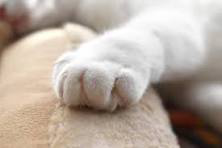

In [12]:

from PIL import Image
from io import BytesIO

# Function to read image from binary data
def read_image(image_data):
    return Image.open(BytesIO(image_data))

df['Image_demo'] = df['Image_demo'].apply(read_image)

df["Image_demo"][0]